## Balldrop

### Imports

In [112]:
import random
from collections import Counter as Counter
import matplotlib.pyplot as plt
import math

### Variables

In [113]:
multipliers = [0, 2, 0.5, 0, 0.5, 2, 0]

### Main function
Arguments: 
- `games`   - Number of iterations
- `bet`     - Amount of bet to use at each game
- `lines`   - Height of the plinko model
- `mult`    - The multiplier object to use

In [114]:
def Play(games=1, bet=500, lines=8, mult=multipliers, slots=0):
    
    slots_without_walls = lines + 1
    if (slots==0):
        slots = slots_without_walls
    results = []
    reward = []
    for game in range(games):
        r = 0
        for line in range(lines):
            if (random.randint(0, 1) == 1):
                r += 1

        # If the result wouldn't be symmetric, we adjust it to be symmetric
        if (slots != slots_without_walls):
            slot_difference = slots_without_walls - slots
            if r == 0:
                r = math.ceil(float(slot_difference) / 2.0)
            elif r == lines:
                r = lines - math.ceil(float(slot_difference) / 2.0)

        results.append(r)
        reward.append(bet*mult[r])
    cost = games*bet
    results_sorted = dict(sorted(Counter(results).items()))
    print(f"The balls fell into these holes: {results_sorted}.")
    print(f"Your costs: {cost}.")
    print(f"You got back: {sum(reward)}.")
    print(f"Overall: {-cost + sum(reward)}")
    return(results_sorted)

### Function for plotting

In [115]:
def plot(results):
    
    x = list(results.keys())
    y = list(results.values())

    fig_width = len(x) * 1.0
    fig_height = 6

    plt.figure(figsize=(fig_width, fig_height))
    plt.bar(x, y)
    
    plt.xlabel('Slots')
    plt.ylabel('Number of balls in slots')
    plt.title('Bar Plot of Plinko')

    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

### Running the code

The balls fell into these holes: {1: 199, 2: 277, 3: 320, 4: 204}.
Your costs: 500000.
You got back: 319250.0.
Overall: -180750.0


/var/folders/9s/l6r044ns1n701jn7g79w6l180000gn/T/ipykernel_8282/3782953362.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


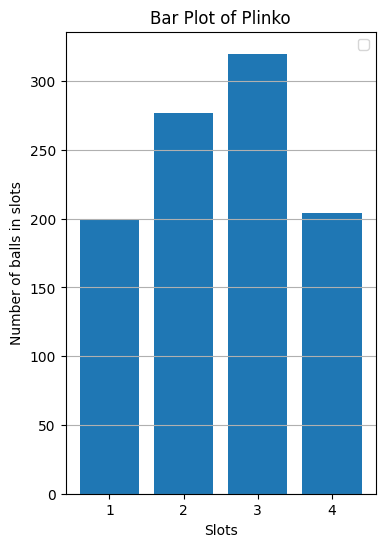

In [116]:
results_sorted = Play(games=1000, bet=500, lines=5, slots=5)
plot(results_sorted)